In [13]:
import GPy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

import time

In [3]:
df=pd.read_csv('Concrete_Data.csv')
df1=df

df1.columns=["Cement","Blast_Furance","Fly_Ash","Water","Superplasticizer","Coarse_Aggregate","Fine_Aggregate","Age","Strength"]
df1.head()

X=df1.drop("Strength",axis=1).values
Y=df1["Strength"].values.reshape(-1,1)

X_train,X_test,Y_train,Y_test=X[:700],X[700::],Y[:700],Y[700::]


In [7]:

#Cement
K1=GPy.kern.Matern32(1,ARD=True,variance=4169.465933438534,lengthscale=1549.9147563919944,active_dims=[0])

#Blast_Furance
k1=GPy.kern.PeriodicExponential(1,variance=9.361692650954631e-07,lengthscale=147.2139294986865,period=19.101741117437783,active_dims=[1])
k2=GPy.kern.RBF(1,ARD=True,variance=189.65509369615947,lengthscale=214.5073292829563,active_dims=[1])
k3=GPy.kern.Matern32(1,ARD=True,variance=112.94406169745655,lengthscale=1.3663048254769852e-95,active_dims=[1])
K2=k1+k2+k3


#Fly_ash
k4=GPy.kern.RBF(1,ARD=True,variance=1221.6749702362074,lengthscale=1132.6018572227545,active_dims=[2])
k5=GPy.kern.Matern32(1,ARD=True,variance=11.712243768585925,lengthscale=0.058175069229113856,active_dims=[2])

K3=k4+k5

#water
K4=GPy.kern.Exponential(1,ARD=True,variance=1445.9271756267851,lengthscale=50.55227037981031,active_dims=[3])


#Superplasticizer
k6=GPy.kern.RBF(1,ARD=True,variance=1304.0943832273217,lengthscale=50.9404018497552,active_dims=[4])
k7=GPy.kern.Matern32(1,ARD=True,variance=1164.1031437031368,lengthscale=327.4938419600094,active_dims=[4])
k8=GPy.kern.Exponential(1,ARD=True,variance=49.39428716580325,lengthscale=1.2396576667342685e-11,active_dims=[4])
K5=k6+k7+k8


# coarse aggregate
K6=GPy.kern.Linear(1,ARD=True,variances=0.001338907851601497,active_dims=[5])


# fine aggregrate
k9=GPy.kern.RatQuad(1,ARD=True,variance=1185.4575468073592,lengthscale=0.08254820314509405,power=3.9762096123034e-55,active_dims=6)
k10=GPy.kern.Matern32(1,ARD=True,variance=101.32714527577565,lengthscale=	1.759107268443224e-27,active_dims=[6])

K7=k9+k10

#Age
K8=GPy.kern.PeriodicExponential(1,variance=197.98490097302098,lengthscale=0.3662920954077468,period=9.733693649716308,active_dims=[7])


In [8]:
KERNAL=K1*K2*K3*K4*K5*K6*K7*K8

In [9]:
main=GPy.models.GPRegression(X_train,Y_train,kernel=KERNAL)
main

GP_regression.,value,constraints,priors
mul.Mat32.variance,4169.465933438534,+ve,
mul.Mat32.lengthscale,1549.9147563919944,+ve,
mul.sum.periodic_exponential.variance,9.361692650954631e-07,+ve,
mul.sum.periodic_exponential.lengthscale,147.2139294986865,+ve,
mul.sum.periodic_exponential.period,19.101741117437783,+ve,
mul.sum.rbf.variance,189.65509369615947,+ve,
mul.sum.rbf.lengthscale,214.5073292829563,+ve,
mul.sum.Mat32.variance,112.94406169745655,+ve,
mul.sum.Mat32.lengthscale,1.3663048254769852e-95,+ve,
mul.sum_1.rbf.variance,1221.6749702362074,+ve,


In [10]:
st=time.time()
main.optimize(messages=True)

en = time.time()
print('Time taken = {:.2f} seconds'.format(en-st))
main

 C:\Users\uamit\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:166: RuntimeWarning:overflow encountered in true_divide


Time taken = 69.47 seconds


GP_regression.,value,constraints,priors
mul.Mat32.variance,4169.456996966842,+ve,
mul.Mat32.lengthscale,1530.7151893411763,+ve,
mul.sum.periodic_exponential.variance,9.160713783835959e-07,+ve,
mul.sum.periodic_exponential.lengthscale,147.21407351542823,+ve,
mul.sum.periodic_exponential.period,19.153950169450905,+ve,
mul.sum.rbf.variance,368.38484896490627,+ve,
mul.sum.rbf.lengthscale,296.8849262453019,+ve,
mul.sum.Mat32.variance,2.3286268690025424e-82,+ve,
mul.sum.Mat32.lengthscale,1.3663048254769852e-95,+ve,
mul.sum_1.rbf.variance,1222.4666837540353,+ve,


In [65]:
mean,variance=main.predict(X_train)
print(np.sqrt(mean_squared_error(Y_train,mean.reshape(-1,1))))
mean1,variance1=main.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,mean1.reshape(-1,1))))


4.9091248886265415
198.09449602868352


In [8]:
df=pd.read_csv('Concrete_Data.csv')
df1=df

df1.columns=["Cement","Blast_Furance","Fly_Ash","Water","Superplasticizer","Coarse_Aggregate","Fine_Aggregate","Age","Strength"]
df1.head()

X=df1.drop("Strength",axis=1).values
Y=df1["Strength"].values.reshape(-1,1)

X_train,X_test,Y_train,Y_test=X[:700],X[700::],Y[:700],Y[700::]



#Cement
K1=GPy.kern.Matern32(1,ARD=True,variance=4169.465933438534,lengthscale=1549.9147563919944,active_dims=[0])

#Blast_Furance
k1=GPy.kern.PeriodicExponential(1,variance=9.361692650954631e-07,lengthscale=147.2139294986865,period=19.101741117437783,active_dims=[1])
k2=GPy.kern.RBF(1,ARD=True,variance=189.65509369615947,lengthscale=214.5073292829563,active_dims=[1])
k3=GPy.kern.Matern32(1,ARD=True,variance=112.94406169745655,lengthscale=1.3663048254769852e-95,active_dims=[1])
K2=k1+k2+k3


#Fly_ash
k4=GPy.kern.RBF(1,ARD=True,variance=1221.6749702362074,lengthscale=1132.6018572227545,active_dims=[2])
k5=GPy.kern.Matern32(1,ARD=True,variance=11.712243768585925,lengthscale=0.058175069229113856,active_dims=[2])

K3=k4+k5

#water
K4=GPy.kern.Exponential(1,ARD=True,variance=1445.9271756267851,lengthscale=50.55227037981031,active_dims=[3])


#Superplasticizer
k6=GPy.kern.RBF(1,ARD=True,variance=1304.0943832273217,lengthscale=50.9404018497552,active_dims=[4])
k7=GPy.kern.Matern32(1,ARD=True,variance=1164.1031437031368,lengthscale=327.4938419600094,active_dims=[4])
k8=GPy.kern.Exponential(1,ARD=True,variance=49.39428716580325,lengthscale=1.2396576667342685e-11,active_dims=[4])
K5=k6+k7+k8


# coarse aggregate
K6=GPy.kern.Linear(1,ARD=True,variances=0.001338907851601497,active_dims=[5])


# fine aggregrate
k9=GPy.kern.RatQuad(1,ARD=True,variance=1185.4575468073592,lengthscale=0.08254820314509405,power=3.9762096123034e-55,active_dims=6)
k10=GPy.kern.Matern32(1,ARD=True,variance=101.32714527577565,lengthscale=	1.759107268443224e-27,active_dims=[6])

K7=k9+k10

#Age
K8=GPy.kern.PeriodicExponential(1,variance=197.98490097302098,lengthscale=0.3662920954077468,period=9.733693649716308,active_dims=[7])


KERNAL=K1*K2*K3*K4*K5*K6*K7*K8

main=GPy.models.GPRegression(X_train,Y_train,kernel=KERNAL)
st=time.time()
main.optimize(messages=True)

en = time.time()
print('Time taken = {:.2f} seconds'.format(en-st))
main

 C:\Users\uamit\Anaconda3\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


 C:\Users\uamit\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:166: RuntimeWarning:overflow encountered in true_divide


Time taken = 82.35 seconds


GP_regression.,value,constraints,priors
mul.Mat32.variance,4169.456996966842,+ve,
mul.Mat32.lengthscale,1530.7151893411763,+ve,
mul.sum.periodic_exponential.variance,9.160713783835959e-07,+ve,
mul.sum.periodic_exponential.lengthscale,147.21407351542823,+ve,
mul.sum.periodic_exponential.period,19.153950169450905,+ve,
mul.sum.rbf.variance,368.38484896490627,+ve,
mul.sum.rbf.lengthscale,296.8849262453019,+ve,
mul.sum.Mat32.variance,2.3286268690025424e-82,+ve,
mul.sum.Mat32.lengthscale,1.3663048254769852e-95,+ve,
mul.sum_1.rbf.variance,1222.4666837540353,+ve,


In [32]:
df=pd.read_csv('Concrete_Data.csv')
df1=df

df1.columns=["Cement","Blast_Furance","Fly_Ash","Water","Superplasticizer","Coarse_Aggregate","Fine_Aggregate","Age","Strength"]
df1.head()

X=df1.drop("Strength",axis=1).values
Y=df1["Strength"].values.reshape(-1,1)

X_train,X_test,Y_train,Y_test=X[:900],X[900::],Y[:900],Y[900::]


#Cement
K1=GPy.kern.Matern32(1,ARD=True,variance=4169.465933438534,lengthscale=1549.9147563919944,active_dims=[0])

#Blast_Furance
k1=GPy.kern.PeriodicExponential(1,variance=9.361692650954631e-07,lengthscale=147.2139294986865,period=19.101741117437783,active_dims=[1])
k2=GPy.kern.RBF(1,ARD=True,variance=189.65509369615947,lengthscale=214.5073292829563,active_dims=[1])
k3=GPy.kern.Matern32(1,ARD=True,variance=112.94406169745655,lengthscale=1.3663048254769852e-95,active_dims=[1])
K2=k1+k2+k3


#Fly_ash
k4=GPy.kern.RBF(1,ARD=True,variance=1221.6749702362074,lengthscale=1132.6018572227545,active_dims=[2])
k5=GPy.kern.Matern32(1,ARD=True,variance=11.712243768585925,lengthscale=0.058175069229113856,active_dims=[2])

K3=k4+k5

#water
K4=GPy.kern.Exponential(1,ARD=True,variance=1445.9271756267851,lengthscale=50.55227037981031,active_dims=[3])


#Superplasticizer
k6=GPy.kern.RBF(1,ARD=True,variance=1304.0943832273217,lengthscale=50.9404018497552,active_dims=[4])
k7=GPy.kern.Matern32(1,ARD=True,variance=1164.1031437031368,lengthscale=327.4938419600094,active_dims=[4])
k8=GPy.kern.Exponential(1,ARD=True,variance=49.39428716580325,lengthscale=1.2396576667342685e-11,active_dims=[4])
K5=k6+k7+k8


# coarse aggregate
K6=GPy.kern.Linear(1,ARD=True,variances=0.001338907851601497,active_dims=[5])


# fine aggregrate
k9=GPy.kern.RatQuad(1,ARD=True,variance=1185.4575468073592,lengthscale=0.08254820314509405,power=3.9762096123034e-55,active_dims=6)
k10=GPy.kern.Matern32(1,ARD=True,variance=101.32714527577565,lengthscale=	1.759107268443224e-27,active_dims=[6])

K7=k9+k10

#Age
K8=GPy.kern.PeriodicExponential(1,variance=197.98490097302098,lengthscale=0.3662920954077468,period=9.733693649716308,active_dims=[7])


KERNAL=K1*K2*K3*K4*K5*K6*K7*K8


 C:\Users\uamit\Anaconda3\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


In [22]:
df=pd.read_csv('Concrete_Data.csv')
df1=df

df1.columns=["Cement","Blast_Furance","Fly_Ash","Water","Superplasticizer","Coarse_Aggregate","Fine_Aggregate","Age","Strength"]
df1.head()

X=df1.drop("Strength",axis=1).values
Y=df1["Strength"].values.reshape(-1,1)

X_train,X_test,Y_train,Y_test=X[:900],X[900::],Y[:900],Y[900::]


k1=GPy.kern.RBF(8,ARD=True,active_dims=[0,1,2,3,4,5,6,7])

st=time.time()

spmod=GPy.models.SparseGPRegression(X_train,Y_train,kernel=k1,num_inducing=20)

spmod.optimize(messages=True,max_iters=2000)
#st=time.time()
Y_train_mean,va=spmod.predict(X_train,full_cov=True)
Y_test_mean,var=spmod.predict(X_test,full_cov=True)
et=time.time()
print("time", et-st)
print(np.sqrt(mean_squared_error(Y_train,Y_train_mean.reshape(-1,1))))
print(np.sqrt(mean_squared_error(Y_test,Y_test_mean.reshape(-1,1))))


time 1.5946860313415527
40.236760964183496
34.13683773827375


In [31]:
df=pd.read_csv('Concrete_Data.csv')
df1=df

df1.columns=["Cement","Blast_Furance","Fly_Ash","Water","Superplasticizer","Coarse_Aggregate","Fine_Aggregate","Age","Strength"]
df1.head()

X=df1.drop("Strength",axis=1).values
Y=df1["Strength"].values.reshape(-1,1)

X_train,X_test,Y_train,Y_test=X[:900],X[900::],Y[:900],Y[900::]


k1=GPy.kern.RBF(8,ARD=True,active_dims=[0,1,2,3,4,5,6,7],lengthscale=10,variance=3)

st=time.time()

spmod=GPy.models.SparseGPRegression(X_train,Y_train,kernel=k1,num_inducing=20)

spmod.optimize(messages=True,max_iters=2000)
Y_train_mean,va=spmod.predict(X_train,full_cov=True)
Y_test_mean,var=spmod.predict(X_test,full_cov=True)
et=time.time()
print("time", et-st)
print(np.sqrt(mean_squared_error(Y_train,Y_train_mean.reshape(-1,1))))
print(np.sqrt(mean_squared_error(Y_test,Y_test_mean.reshape(-1,1))))


time 34.35010123252869
6.294940884868431
7.046475001887836


In [30]:
df=pd.read_csv('Concrete_Data.csv')
df1=df

df1.columns=["Cement","Blast_Furance","Fly_Ash","Water","Superplasticizer","Coarse_Aggregate","Fine_Aggregate","Age","Strength"]
df1.head()

X=df1.drop("Strength",axis=1).values
Y=df1["Strength"].values.reshape(-1,1)

X_train,X_test,Y_train,Y_test=X[:500],X[500::],Y[:500],Y[500::]


k1=GPy.kern.RBF(8,ARD=True,active_dims=[0,1,2,3,4,5,6,7],lengthscale=10,variance=3)

st=time.time()

spmod=GPy.models.SparseGPRegression(X_train,Y_train,kernel=k1,num_inducing=20)

spmod.optimize(messages=True,max_iters=10000)
Y_train_mean,va=spmod.predict(X_train,full_cov=True)
Y_test_mean,var=spmod.predict(X_test,full_cov=True)
et=time.time()
print("time", et-st)
print(np.sqrt(mean_squared_error(Y_train,Y_train_mean.reshape(-1,1))))
print(np.sqrt(mean_squared_error(Y_test,Y_test_mean.reshape(-1,1))))


time 21.192771434783936
5.861614288674849
10.549882199019768


In [34]:
df=pd.read_csv('Concrete_Data.csv')
df1=df

df1.columns=["Cement","Blast_Furance","Fly_Ash","Water","Superplasticizer","Coarse_Aggregate","Fine_Aggregate","Age","Strength"]
df1.head()

X=df1.drop("Strength",axis=1).values
Y=df1["Strength"].values.reshape(-1,1)

X_train,X_test,Y_train,Y_test=X[:500],X[500::],Y[:500],Y[500::]


k1=GPy.kern.RBF(8,ARD=True,active_dims=[0,1,2,3,4,5,6,7],lengthscale=10,variance=3)

st=time.time()

spmod=GPy.models.SparseGPRegression(X_train,Y_train,kernel=k1,num_inducing=20)

spmod.optimize(messages=True,max_iters=10000)
Y_train_mean,va=spmod.predict(X_train,full_cov=True)
Y_test_mean,var=spmod.predict(X_test,full_cov=True)
et=time.time()
print("time", et-st)
print(np.sqrt(mean_squared_error(Y_train,Y_train_mean.reshape(-1,1))))
print(np.sqrt(mean_squared_error(Y_test,Y_test_mean.reshape(-1,1))))


time 24.408355712890625
5.922214617851875
10.418119521533114


# iterating the values of num_inducing from 20 to 50 to check its affect on model's optimizing time and RMSE

In [17]:
df=pd.read_csv('Concrete_Data.csv')
df1=df

df1.columns=["Cement","Blast_Furance","Fly_Ash","Water","Superplasticizer","Coarse_Aggregate","Fine_Aggregate","Age","Strength"]
df1.head()

X=df1.drop("Strength",axis=1).values
Y=df1["Strength"].values.reshape(-1,1)

time_taken,train_accuracy,test_accuracy=[],[],[]

X_train,X_test,Y_train,Y_test=X[:900],X[900::],Y[:900],Y[900::]

for i in [20,25,30,35,40,45,50]:

    k1=GPy.kern.RBF(8,ARD=True,active_dims=[0,1,2,3,4,5,6,7],lengthscale=10,variance=3)

    st=time.time()

    spmod=GPy.models.SparseGPRegression(X_train,Y_train,kernel=k1,num_inducing=i)

    spmod.optimize(messages=True,max_iters=8000)
    Y_train_mean,va=spmod.predict(X_train,full_cov=True)
    Y_test_mean,var=spmod.predict(X_test,full_cov=True)
    et=time.time()
    print("time", et-st)
    time_taken.append(et-st)
    print(np.sqrt(mean_squared_error(Y_train,Y_train_mean.reshape(-1,1))))
    
    train_accuracy.append(np.sqrt(mean_squared_error(Y_train,Y_train_mean.reshape(-1,1))))
    
    print(np.sqrt(mean_squared_error(Y_test,Y_test_mean.reshape(-1,1))))
    
    test_accuracy.append(np.sqrt(mean_squared_error(Y_test,Y_test_mean.reshape(-1,1))))


time 0.6119494438171387
8.610252364149844
7.517609742355497


 C:\Users\uamit\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\uamit\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


 C:\Users\uamit\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\uamit\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add


time 28.90029001235962
5.872533698844759
6.71261940833923


time 0.9139437675476074
7.714912483687717
6.727274094312302


 C:\Users\uamit\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


time 26.456466674804688
5.573674272881828
6.785262766697278


time 23.922946214675903
5.47682664091363
6.724673335443239


time 54.5155725479126
5.153989390461933
6.3653714542340705


time 63.303168058395386
5.344417286423286
6.663924940065466


[8.610252364149844, 5.872533698844759, 7.714912483687717, 5.573674272881828, 5.47682664091363, 5.153989390461933, 5.344417286423286]


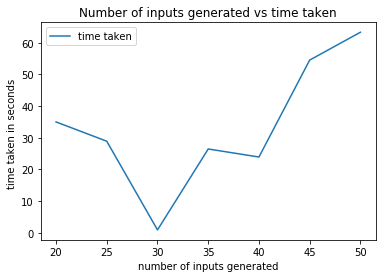

In [22]:
pat=[20,25,30,35,40,45,50]
time_taken[0]=35

plt.plot(pat,time_taken,label="time taken")

plt.legend()
plt.title("Number of inputs generated vs time taken")
plt.xlabel("number of inputs generated")
plt.ylabel("time taken in seconds ")
print(train_accuracy)

[8.610252364149844, 5.872533698844759, 7.714912483687717, 5.573674272881828, 5.47682664091363, 5.153989390461933, 5.344417286423286]


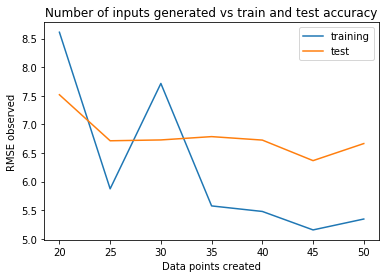

In [23]:
plt.plot(pat,train_accuracy,label="training")
plt.plot(pat,test_accuracy,label="test")

plt.xlabel("Data points created")
plt.title("Number of inputs generated vs train and test accuracy")

plt.ylabel("RMSE observed")
plt.legend()

print(train_accuracy)